## **Project 4. Student Performance**
> **(Team 9) Mahind Rao, Rachel Schoen, Andrea Wu, Mahalel Peter**

### I. **Introduction**
* *   * * 

For this project, we sought to explore a means to analyze and predict student performance based off a multitude of different variables, including but not limited to: attendance, taking notes, reading frequency, transporation, scholarships, and even parental status.

In other words:

> **What are the key factors that influence the success of a student?**


- How do students with additional work responsibilities fare academically compared to those without?
- How does the type of accommodation affect students' study habits and performance?
- How does discussion and group work influence students' interest and success in their courses?
- Can we predict a student’s academic performance (e.g., grade point average or success in courses) based on their personal background, study habits, and extracurricular activities?

* *   * * 
We decided to approach the topic in the following outline:

#### A. **Exploratory Data Analysis**
  - Create basic visualizations to observe any trends or patterns using Matplotlib or Tableau.
  - Create some sort of interactivity with the graphs, most likely with a Tableau dashboard.

#### B. **SQL Database**
  - Populate a SQL database using the CSV file, then connect to the database in order to continue analysis and predictions.
  - **Bonus:** Set up a SQL database server and connect to it via internet as opposed to a direct sqlite file.

#### C. **Data Modeling**
  - Create a relational data model, or a graph data model.
  - Use supervised learning.
  - Create a Logistic Regression model.

#### D. **Model Optimization and Evaluation**
  - Try using a different number of layers, activations, optimizers, and epochs to maximize the accuracy of our model.
  - Try splitting the data to optimize the model.
  - Try using the Adam algorithm with our model for further optimization.
  - Evaluate the model's performance by creating a confusion matrix and/or a classification report.

  

### II. **Exploratory Data Analysis**
* *   * * 

In [53]:
import pandas as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [54]:
# Define the file path
path = Path('Resources/StudentsPerformance_with_headers.csv')

# Read the CSV file into DataFrame
master_df = pd.read_csv(path)

master_df

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [55]:
master_df.dtypes
master_df['GRADE'] = pd.to_numeric(master_df['GRADE'])
master_df.dtypes

STUDENT ID                                                           object
Student Age                                                           int64
Sex                                                                   int64
Graduated high-school type                                            int64
Scholarship type                                                      int64
Additional work                                                       int64
Regular artistic or sports activity                                   int64
Do you have a partner                                                 int64
Total salary if available                                             int64
Transportation to the university                                      int64
Accommodation type in Cyprus                                          int64
Mother’s education                                                    int64
Father’s education                                                    int64
Number of si

In [56]:
# Define the mapping from integer grades to labels
grade_mapping = {
    0: 'Fail',
    1: 'DD',
    2: 'DC',
    3: 'CC',
    4: 'CB',
    5: 'BB',
    6: 'BA',
    7: 'AA'
}

# Create a new column 'GRADE_LABEL' with the mapped labels
master_df['GRADE_LABEL'] = master_df['GRADE'].map(grade_mapping)
master_df

,STUDENT ID,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,...,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),COURSE ID,GRADE,GRADE_LABEL
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,3,2,1,2,1,1,1,1,DD
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,3,2,3,2,2,3,1,1,DD
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,2,2,1,1,2,2,1,1,DD
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,3,2,2,1,3,2,1,1,DD
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,2,2,2,1,2,2,1,1,DD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,2,1,2,1,3,3,9,5,BB
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,3,2,2,1,5,3,9,5,BB
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,3,3,2,1,4,3,9,1,DD
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,1,2,1,2,1,5,3,9,4,CB


In [57]:
# Get the frequency count of each grade
grade_summary = master_df['GRADE'].value_counts()

# Sort by the index (grades)
sorted_grade_summary = grade_summary.sort_index()

# Convert to DataFrame for display purposes
grade_summary_df = sorted_grade_summary.reset_index()
grade_summary_df.columns = ['GRADE', 'Count']

# Define the mapping from integer grades to labels
grade_mapping = {
    0: 'Fail',
    1: 'DD',
    2: 'DC',
    3: 'CC',
    4: 'CB',
    5: 'BB',
    6: 'BA',
    7: 'AA'
}

# Create a new column 'GRADE_LABEL' with the mapped labels
grade_summary_df['GRADE_LABEL'] = grade_summary_df['GRADE'].map(grade_mapping)

print(grade_summary_df)



   GRADE  Count GRADE_LABEL
0      0      8        Fail
1      1     35          DD
2      2     24          DC
3      3     21          CC
4      4     10          CB
5      5     17          BB
6      6     13          BA
7      7     17          AA


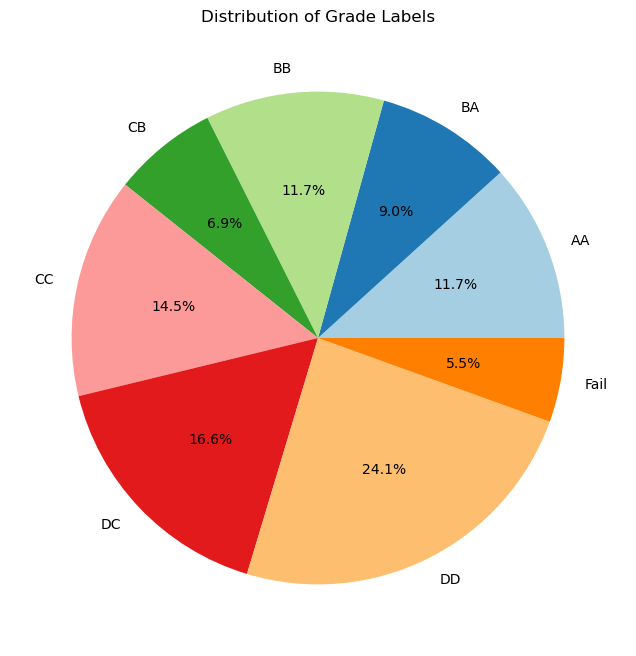

In [58]:
# Get the count of each grade label
grade_counts = master_df['GRADE_LABEL'].value_counts()

# Define the desired order
grade_order = ['AA', 'BA', 'BB', 'CB', 'CC', 'DC', 'DD', 'Fail']

# Reorder the counts according to the defined order
ordered_grade_counts = grade_counts.reindex(grade_order, fill_value=0)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ordered_grade_counts, labels=ordered_grade_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(ordered_grade_counts))))

# Add title
plt.title('Distribution of Grade Labels')

# Show the plot
plt.show()

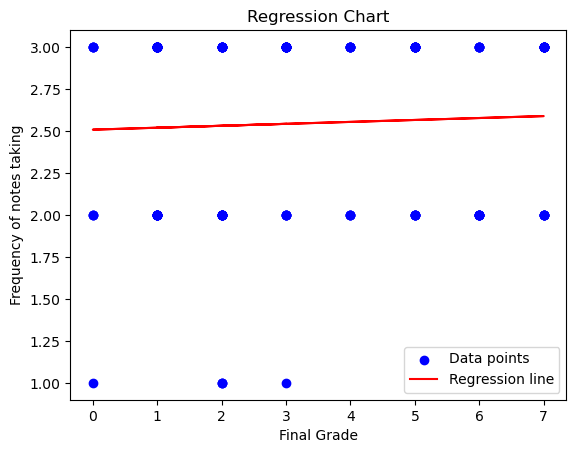

In [59]:
#Run regression on taking notes in class and Final Grades

X = master_df['GRADE'].values.reshape(-1, 1)  
y = master_df['Taking notes in classes'].values 

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
y_pred = model.predict(X)

# Plot the data points (scatter plot)
plt.scatter(master_df['GRADE'], master_df['Taking notes in classes'], color='blue', label='Data points')

# Plot the regression line
plt.plot(master_df['GRADE'], y_pred, color='red', label='Regression line')

# Add title and labels
plt.title('Regression Chart')
plt.xlabel('Final Grade')
plt.ylabel('Frequency of notes taking')
plt.legend()

# Show the plot
plt.show()

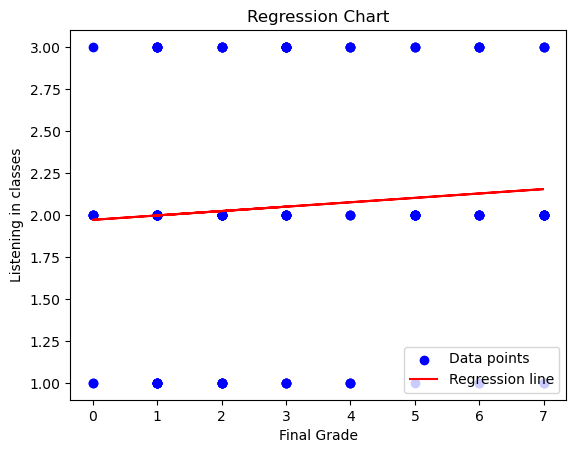

In [60]:
#Run regression on listening in class and Final Grades

X = master_df['GRADE'].values.reshape(-1, 1)  
y = master_df['Listening in classes'].values 

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Predict values for the regression line
y_pred = model.predict(X)

# Plot the data points (scatter plot)
plt.scatter(master_df['GRADE'], master_df['Listening in classes'], color='blue', label='Data points')

# Plot the regression line
plt.plot(master_df['GRADE'], y_pred, color='red', label='Regression line')

# Add title and labels
plt.title('Regression Chart')
plt.xlabel('Final Grade')
plt.ylabel('Listening in classes')
plt.legend()

# Show the plot
plt.show()

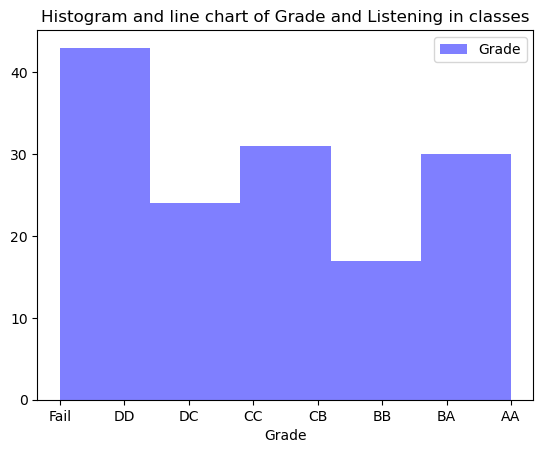

In [61]:
# Create a histogram for both variables
plt.hist(master_df['GRADE'], bins=5, color='blue', alpha=0.5, label='Grade')


# Add title and labels
plt.title('Histogram and line chart of Grade and Listening in classes')
plt.xlabel('Grade')

# Update tick labels for x-axis
grade_labels = ['Fail', 'DD', 'DC', 'CC', 'CB', 'BB', 'BA', 'AA']
plt.xticks(ticks=range(len(grade_labels)), labels=grade_labels)

# Add legend
plt.legend()

# Show the plot
plt.show()

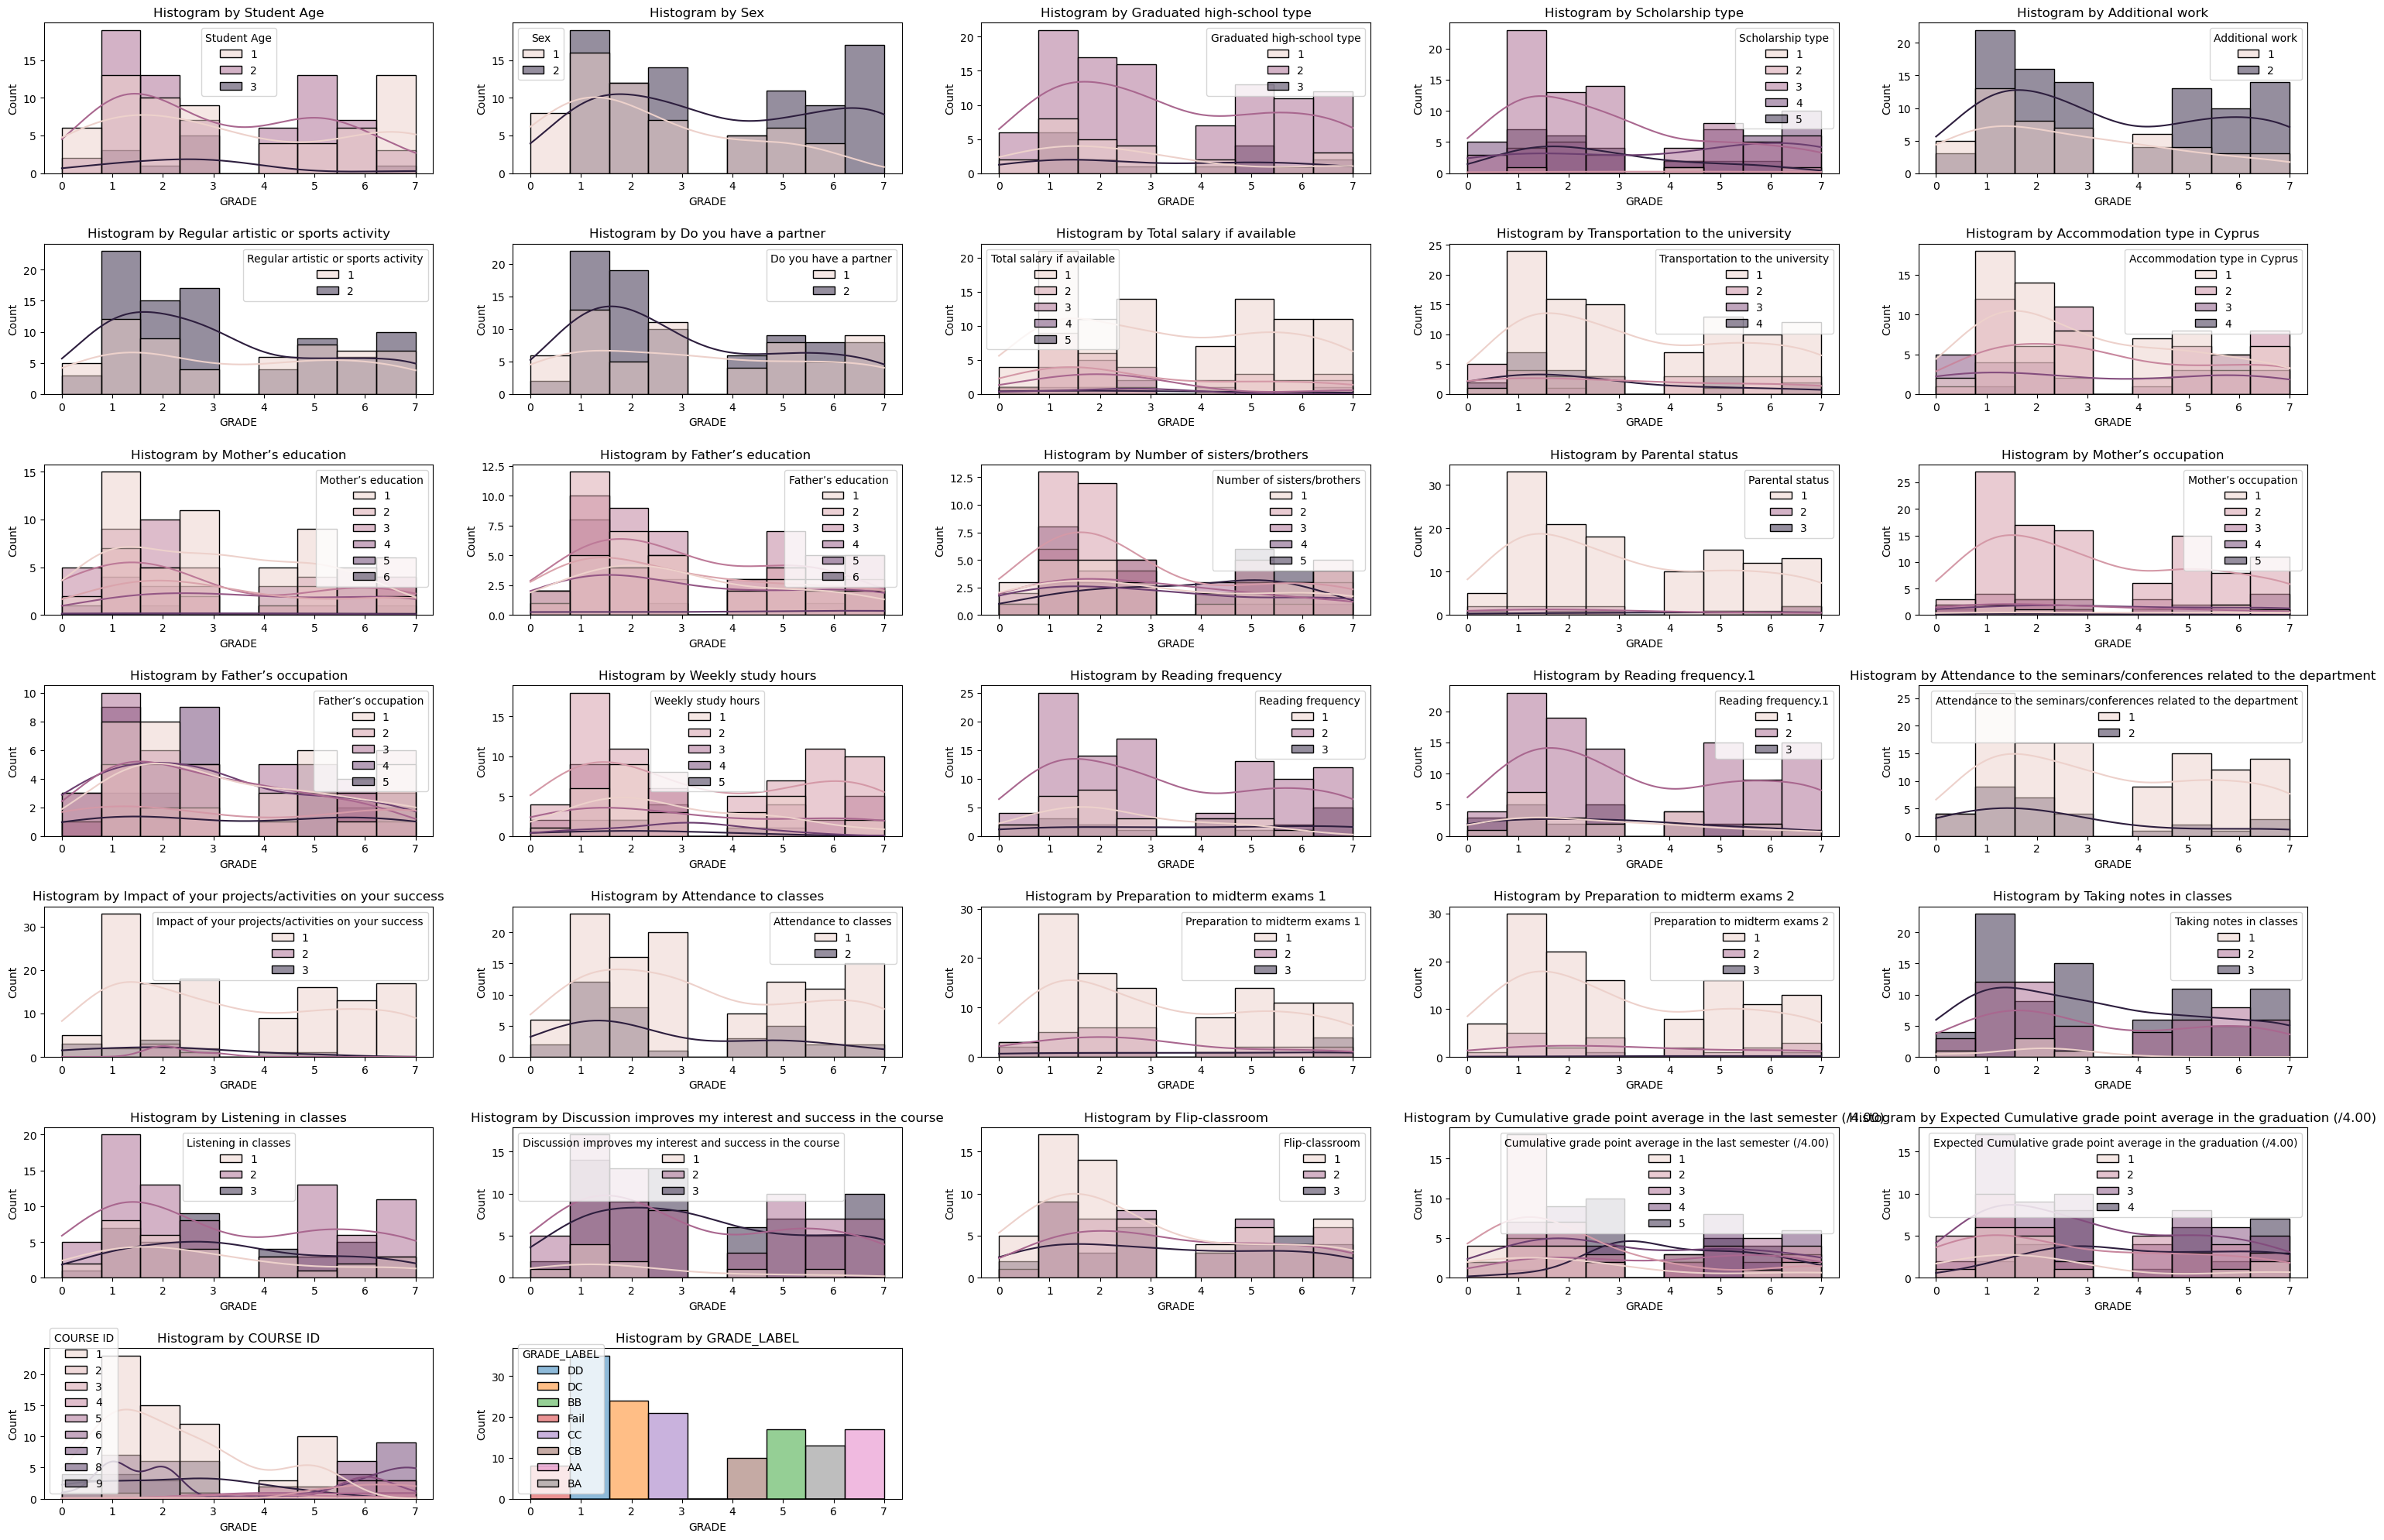

In [69]:

# Define the column to use as the x-axis value
x_column = 'GRADE'

# Define the columns to exclude 
exclude_columns = [x_column, 'STUDENT ID']

# Define the columns to use as hue 
columns = [col for col in master_df.columns if col not in exclude_columns]

# Calculate number of subplots
num_columns = len(columns)
num_rows = (num_columns // 5) + (num_columns % 5 != 0)  # Calculate rows needed


# Set up the figure
plt.figure(figsize=(30, 20))

# Iterate over hue columns and create subplots
for i, hue_column in enumerate(columns):
    plt.subplot(num_rows, 5, i + 1)
    # Plot histogram with hue
    ax = sns.histplot(master_df, x=x_column, hue=hue_column, kde=True, alpha=0.5)
    plt.title(f'Histogram by {hue_column}')
    
    # Explicitly handle legend
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles=handles, labels=labels, title=hue_column)

plt.tight_layout()
plt.show()

In [74]:
#Prepare dataframe for correlation
master_df_correlation = master_df.drop(columns=['STUDENT ID','GRADE_LABEL'])

# Calculate the correlation matrix
correlation_matrix = master_df_correlation.corr()

# Sort the correlations by their absolute values
sorted_grade_correlation = grade_correlation.abs().sort_values(ascending=False)



GRADE                                                                1.000000
Sex                                                                  0.335533
Cumulative grade point average in the last semester (/4.00)          0.315493
Expected Cumulative grade point average in the graduation (/4.00)    0.248588
Impact of your projects/activities on your success                   0.203273
Reading frequency                                                    0.195617
Attendance to the seminars/conferences related to the department     0.184763
Additional work                                                      0.167445
Total salary if available                                            0.166352
Transportation to the university                                     0.156289
Discussion improves my interest and success in the course            0.146547
COURSE ID                                                            0.142166
Attendance to classes                                           

### III. **Database Design & Implementation**
* *   * * 

The following is the ERDV diagram of our database.

[insert ERDV here]

There are X tables in total for this database:



1. **Table Name Here**
2. **Table Name Here**
3. **Table Name Here**
4. **Table Name Here**


Each table holds information pertinent to the overarching question of student performance.

The following is the breakdown for each table, including some reasons for choosing to keep the information we did.


> **`Table1`**

- textextextext
- textextextext
- textextextext

> **`Table2`**

- textextextext
- textextextext
- textextextext

> **`Table3`**

- textextextext
- textextextext
- textextextext

> **`Table4`**

- textextextext
- textextextext
- textextextext

**(to be edited further)**

In [ ]:
# code here

### IV. **Data Modeling**
* *   * * 

##### **1. Data Preparation**


**(to be edited further)**

Before we could load the data into tables, we first had to clean the datasets given to us. This was done already in the Exploratory Data Analysis step, but we further eliminated any non-necessary agents in order to perform machine learning.

textextextext.
* *   * * 

In [ ]:
# code here

##### **2. Creating the model**

- Create a relational data model, or a graph data model.
  - Use supervised learning.

In [ ]:
# code here

##### **3. Logistic Regression**

  - Create a Logistic Regression model.

In [ ]:
# code here

##### **4. Model Optimization and Evaluation**
  - Try using a different number of layers, activations, optimizers, and epochs to maximize the accuracy of our model.
  - Try splitting the data to optimize the model.
  - Try using the Adam algorithm with our model for further optimization.
  - Evaluate the model's performance by creating a confusion matrix and/or a classification report.

In [ ]:
# code here

### V. **Final Analysis & Further Considerations**
* *   * * 